Week 1 onboarding: basic tests with convolution and fft

In [174]:
import numpy as np
from scipy.signal import convolve
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import deconvolve


Convolution with square wave in time domain

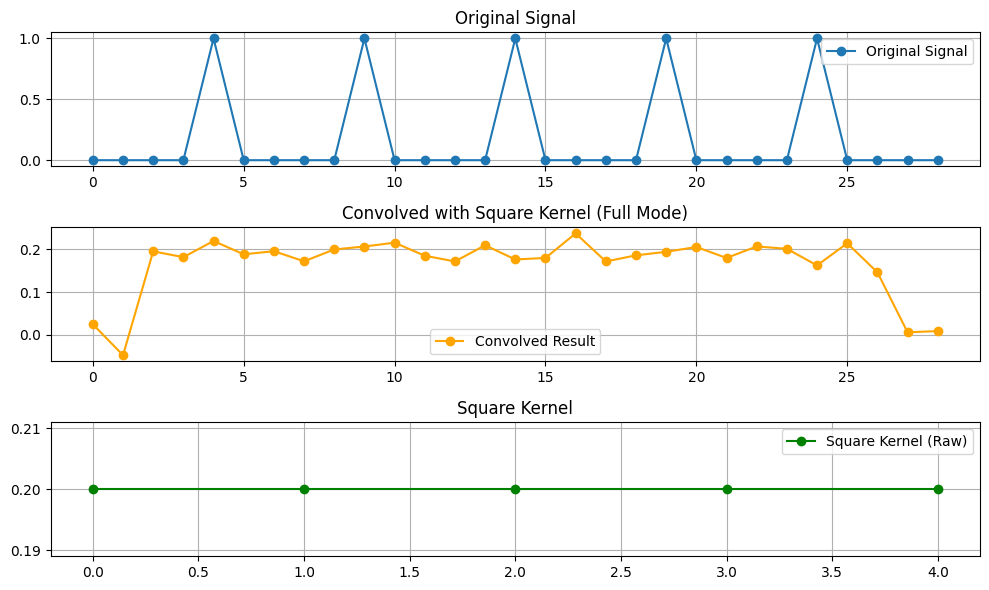

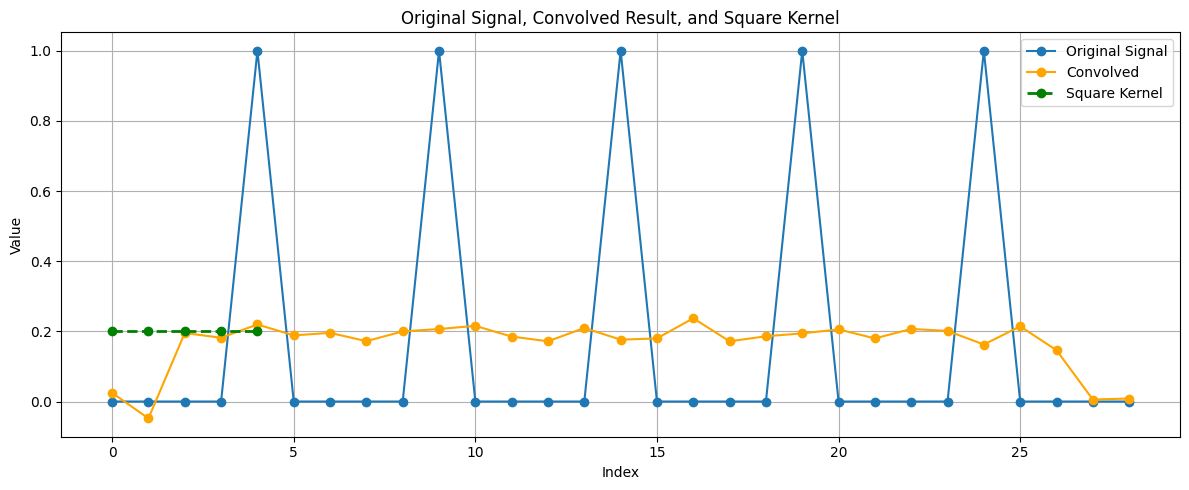

Square Kernel: [0.2 0.2 0.2 0.2 0.2]
Convolved Result: [0.  0.  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.  0. ]


In [175]:

# 1 when heartbeat occurs
x_square = np.array([  0, 0, 0, 0, 1, 
                0, 0, 0, 0, 1, 
                0, 0, 0, 0, 1, 
                0, 0, 0, 0, 1, 
                0, 0, 0, 0, 1, 
                0, 0, 0, 0
            ])

# square wave
kernel_size = 5  # length 5
square_kernel = np.ones(kernel_size) / kernel_size  # 0.2 for all values here, square wave h
h_square = square_kernel  # this is our goal in long run, "can we get h" from x and y (heart beat measurements from PPG)

# when we convolve on the first value of x, we'll get:
# array: [0, 0, 0, 0, 1]
# kernel = [0.2, 0.2, 0.2, 0.2, 0.2]
# multiply: 0*0.2 + 0*0.2 + 0*0.2 + 0*0.2 + 1*0.2 = 0.2 = convolved value

# convolution
y_square = convolve(x_square, h, mode='same')  # show the extra values before we fully align the sliding window
# change to mode="same" to have the output be same size as x, centered w/ respect to full output
# change to mode="full" to get the output to be a full discrete lin combo of inputs (default)

# add noise
noise = 0.02
noisy_y_square = y_square + np.random.normal(0, noise,size=y_square.shape)

# plot
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=False)

# Plot original signal
axs[0].plot(x_square, label="Original Signal", marker='o')
axs[0].set_title("Original Signal")
axs[0].grid(True)
axs[0].legend()

# Plot convolved result
axs[1].plot(noisy_y_square, label="Convolved Result", marker='o', color='orange')
axs[1].set_title("Convolved with Square Kernel (Full Mode)")
axs[1].grid(True)
axs[1].legend()

# Plot the square kernel as-is
axs[2].plot(h_square, label="Square Kernel (Raw)", marker='o', color='green')
axs[2].set_title("Square Kernel")
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()

# plots on same graph
plt.figure(figsize=(12, 5))

# original signal
plt.plot(np.arange(len(x_square)), x_square, label="Original Signal", marker='o', linewidth=1.5)

# convolved result
plt.plot(np.arange(len(noisy_y_square)), noisy_y_square, label="Convolved", marker='o', color='orange', linewidth=1.5)

# raw kernel (plotted starting at index 0)
plt.plot(np.arange(len(h_square)), h_square, label="Square Kernel", marker='o', color='green', linewidth=2, linestyle='--')

plt.title("Original Signal, Convolved Result, and Square Kernel")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# print kernel and result
print("Square Kernel:", h_square)
print("Convolved Result:", y_square)

Convolution with square wave in freq domain

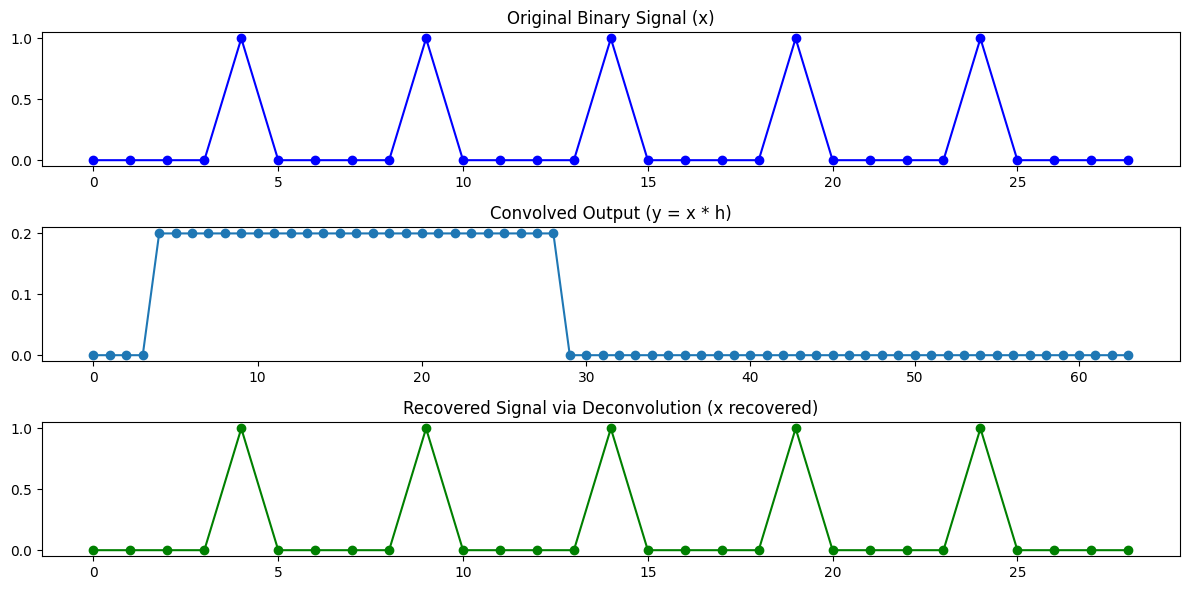

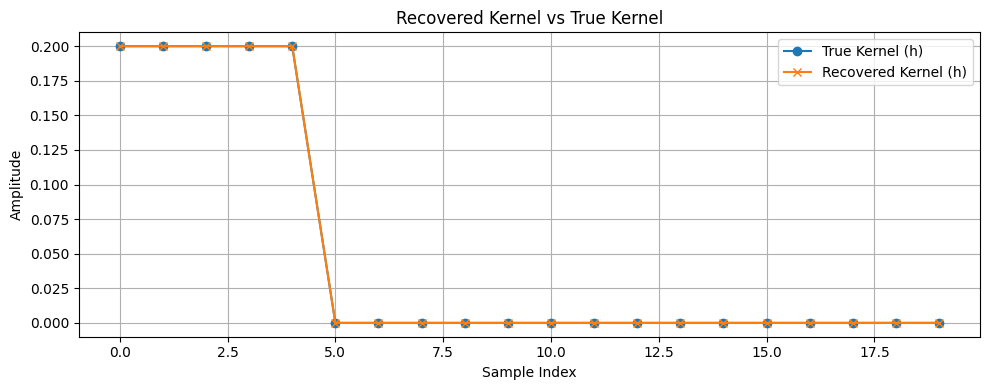

In [176]:
x_square = np.array([  0, 0, 0, 0, 1, 
                0, 0, 0, 0, 1, 
                0, 0, 0, 0, 1, 
                0, 0, 0, 0, 1, 
                0, 0, 0, 0, 1, 
                0, 0, 0, 0
            ])

n = len(x_square) + len(h_square) - 1

# fft: need powers of 2
N = 2 ** int(np.ceil(np.log2(n)))
x_square_padded = np.pad(x_square, (0, N - len(x_square)))  # N entries
h_square_padded = np.pad(h_square, (0, N - len(h_square)))  # N entries

# convolve in freq domain
X_square = np.fft.fft(x_square_padded)  # fft of ECG data
H_square = np.fft.fft(h_square_padded)  # fft of kernel
Y_square = X_square * H_square  # multiply in freq domain = conv in time domain
y_square_conv = np.fft.ifft(Y_square).real  # bring back to time domain

# recover X
X_square_recovered = np.fft.ifft(np.fft.fft(y_square_conv) / H_square).real

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(x_square, marker='o', color='blue')
plt.title("Original Binary Signal (x)")

plt.subplot(3, 1, 2)
plt.plot(y_square_conv, marker='o')
plt.title("Convolved Output (y = x * h)")

plt.subplot(3, 1, 3)
plt.plot(X_square_recovered[:len(x_square)], marker='o', color='green')
plt.title("Recovered Signal via Deconvolution (x recovered)")

plt.tight_layout()
plt.show()


# recover h from y and x
h_square_recovered = np.fft.fft(y_square_conv) / X_square
h_square_recovered = np.fft.ifft(h_square_recovered).real

plt.figure(figsize=(10, 4))
plt.plot(h_square_padded[:20], label='True Kernel (h)', marker='o')
plt.plot(h_square_recovered[:20], label='Recovered Kernel (h)', marker='x')
plt.title("Recovered Kernel vs True Kernel")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




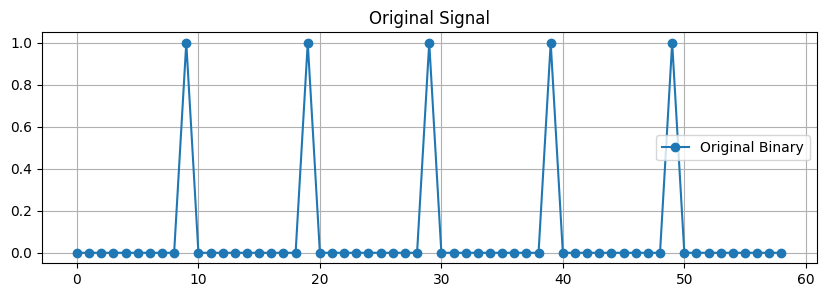

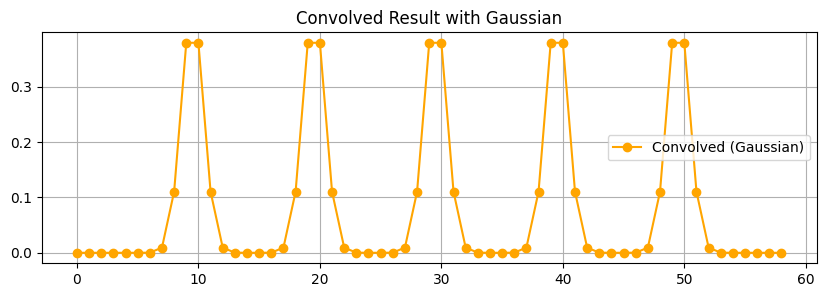

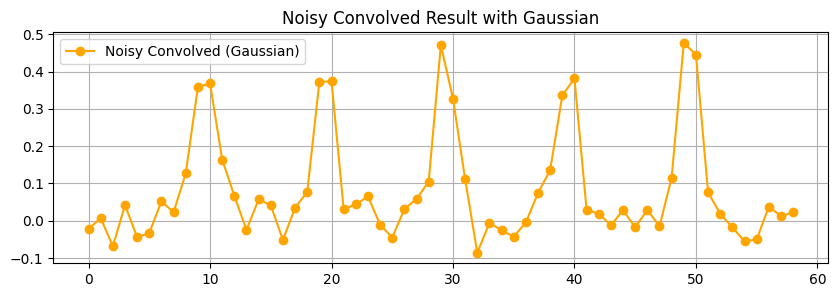

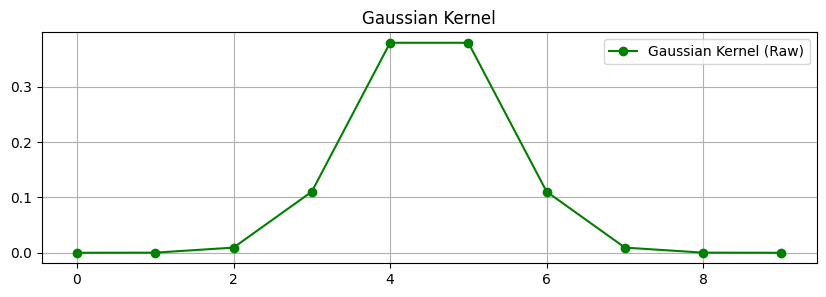

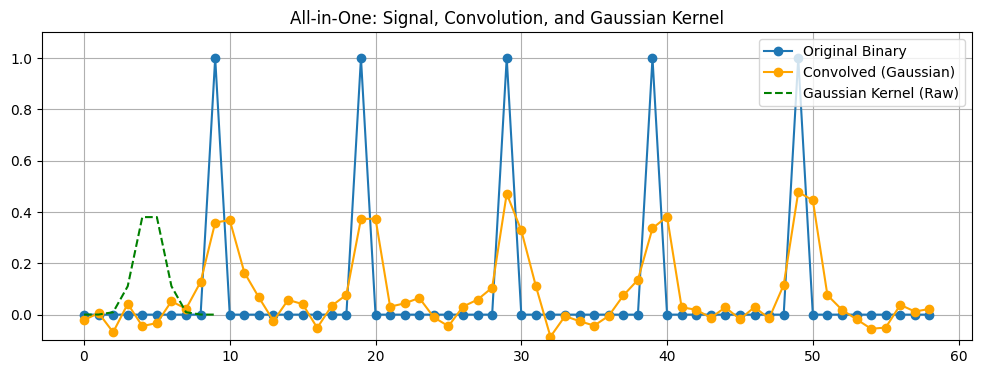

Gaussian Kernel: [1.65191096e-06 2.30489286e-04 9.35726273e-03 1.10530180e-01
 3.79880416e-01 3.79880416e-01 1.10530180e-01 9.35726273e-03
 2.30489286e-04 1.65191096e-06]
Convolved Result: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.65191096e-06 2.30489286e-04 9.35726273e-03
 1.10530180e-01 3.79880416e-01 3.79880416e-01 1.10530180e-01
 9.35726273e-03 2.30489286e-04 1.65191096e-06 1.65191096e-06
 2.30489286e-04 9.35726273e-03 1.10530180e-01 3.79880416e-01
 3.79880416e-01 1.10530180e-01 9.35726273e-03 2.30489286e-04
 1.65191096e-06 1.65191096e-06 2.30489286e-04 9.35726273e-03
 1.10530180e-01 3.79880416e-01 3.79880416e-01 1.10530180e-01
 9.35726273e-03 2.30489286e-04 1.65191096e-06 1.65191096e-06
 2.30489286e-04 9.35726273e-03 1.10530180e-01 3.79880416e-01
 3.79880416e-01 1.10530180e-01 9.35726273e-03 2.30489286e-04
 1.65191096e-06 1.65191096e-06 2.30489286e-04 9.35726273e-03
 1.10530180e-01 3.79880416e-01 3.79880416e-01 1.10530180e-01
 9.35726273e-03 2.

In [177]:
# heartbeat frequency
x_gaussian = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
                         0, 0, 0, 0, 0, 0, 0, 0, 0])

# gaussian kernel
def make_gaussian(size, sigma):
    x = np.linspace(-size // 2, size // 2, size)
    gauss = np.exp(-x ** 2 / (2 * sigma ** 2))
    return gauss / gauss.sum()  # normalize

kernel_size = 10
sigma = 1
gaussian_kernel = make_gaussian(kernel_size, sigma)
h_gaussian = gaussian_kernel

# convolve
convolved_result = convolve(x_gaussian, gaussian_kernel, mode='same')

noise_gaussian = 0.05
noisy_y_gaussian = convolved_result + np.random.normal(0, noise_gaussian, size=convolved_result.shape)

# plot original signal
plt.figure(figsize=(10, 3))
plt.plot(x_gaussian, label="Original Binary", marker='o')
plt.title("Original Signal")
plt.grid(True)
plt.legend()
plt.show()

# plot convolved result
plt.figure(figsize=(10, 3))
plt.plot(convolved_result, label="Convolved (Gaussian)", marker='o', color='orange')
plt.title("Convolved Result with Gaussian")
plt.grid(True)
plt.legend()
plt.show()

# plot noisy convolved result
plt.figure(figsize=(10, 3))
plt.plot(noisy_y_gaussian, label="Noisy Convolved (Gaussian)", marker='o', color='orange')
plt.title("Noisy Convolved Result with Gaussian")
plt.grid(True)
plt.legend()
plt.show()

# plot gaussian kernel
plt.figure(figsize=(10, 3))
plt.plot(gaussian_kernel, label="Gaussian Kernel (Raw)", marker='o', color='green')
plt.title("Gaussian Kernel")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(x_gaussian, label="Original Binary", marker='o')
plt.plot(noisy_y_gaussian, label="Convolved (Gaussian)", marker='o', color='orange')
plt.plot(np.arange(len(gaussian_kernel)), gaussian_kernel, label="Gaussian Kernel (Raw)", linestyle='--', color='green')
plt.title("All-in-One: Signal, Convolution, and Gaussian Kernel")
plt.grid(True)
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

# print actual values
print("Gaussian Kernel:", gaussian_kernel)
print("Convolved Result:", convolved_result)




convolution in freq domain with gaussian

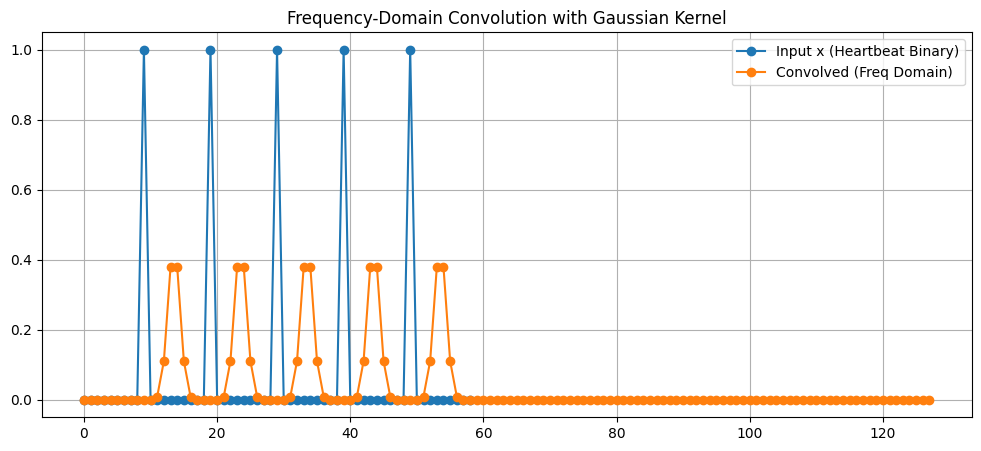

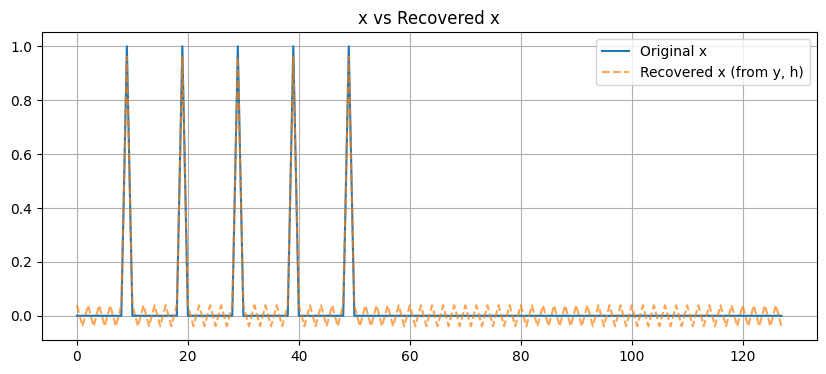

Max of original x: 1
Max of recovered x: 0.9609375000000099


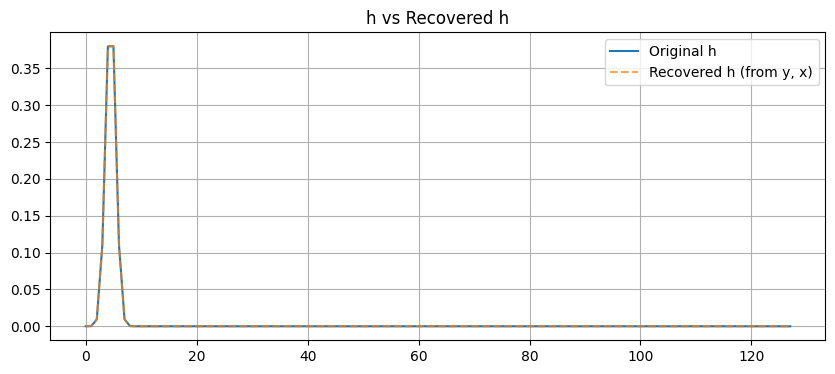

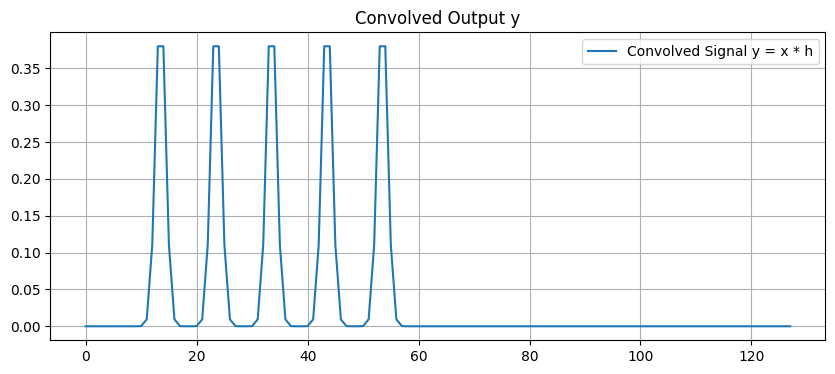

In [197]:
n = len(x_gaussian) + len(gaussian_kernel) - 1

N = 2 ** int(np.ceil(np.log2(n)))
x_gaussian_padded = np.pad(x_gaussian, (0, N - len(x_gaussian)))
h_gaussian_padded = np.pad(h_gaussian, (0, N - len(h_gaussian)))

# fft convolution
X_gaussian = np.fft.fft(x_gaussian_padded)
H_guassian = np.fft.fft(h_gaussian_padded)
Y_gaussian = X_gaussian * H_guassian
y = np.fft.ifft(Y_gaussian).real

#y_gaussian_time = y_gaussian_time[:len(x_gaussian)]  # match to original signal length

# deconvolve to get x
epsilon = 1e-15
X_gaussian_recovered = np.fft.ifft(np.fft.fft(y) / (H_guassian + epsilon)).real

# deconvolve to get h
H_gaussian_recovered = np.fft.ifft(np.fft.fft(y) / X_gaussian).real


# Plot results
plt.figure(figsize=(12, 5))
plt.plot(x_gaussian, label='Input x (Heartbeat Binary)', marker='o')
plt.plot(y, label='Convolved (Freq Domain)', marker='o')
plt.title("Frequency-Domain Convolution with Gaussian Kernel")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 4))
plt.plot(x_gaussian_padded, label="Original x")
plt.plot(X_gaussian_recovered, '--', label="Recovered x (from y, h)", alpha=0.7)
plt.title("x vs Recovered x")
plt.legend()
plt.grid(True)
plt.show()
print("Max of original x:", np.max(x_gaussian_padded))
print("Max of recovered x:", np.max(X_gaussian_recovered))

# --- Plot 2: h vs recovered h ---
plt.figure(figsize=(10, 4))
plt.plot(h_gaussian_padded, label="Original h")
plt.plot(H_gaussian_recovered, '--', label="Recovered h (from y, x)", alpha=0.7)
plt.title("h vs Recovered h")
plt.legend()
plt.grid(True)
plt.show()

# --- Plot 3: y = x * h ---
plt.figure(figsize=(10, 4))
plt.plot(y, label="Convolved Signal y = x * h")
plt.title("Convolved Output y")
plt.legend()
plt.grid(True)
plt.show()



FFT of the noisy convolutions

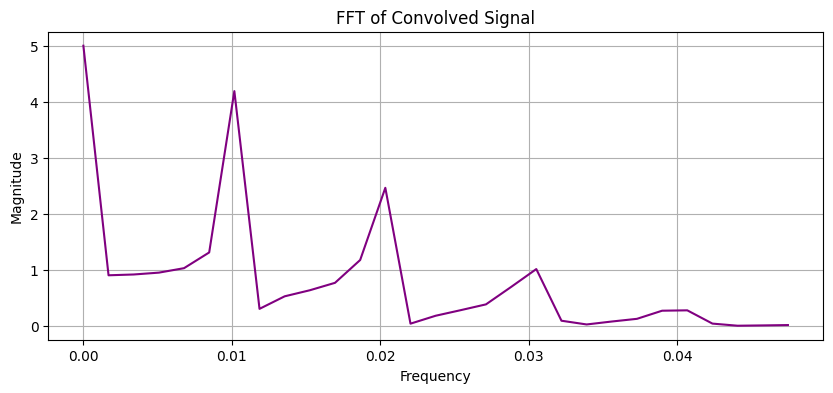

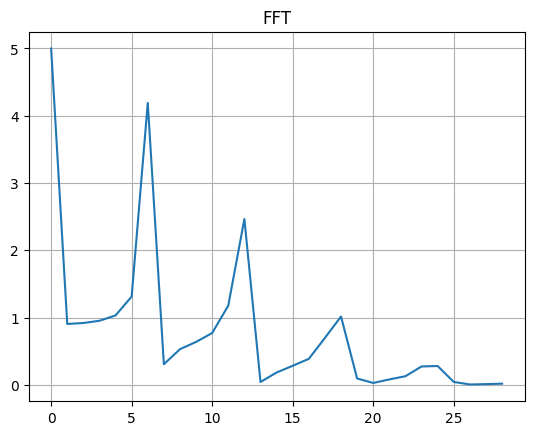

In [158]:
# FFT Parameters
signal = convolved_result  # or use noisy_result if you added noise
N = len(signal)
T = 10  # Sample spacing (change if you have a real sampling rate)

# Compute FFT
yf = fft(signal)
xf = fftfreq(N, T)[:N // 2]  # only positive frequencies since symmetric

# Plot
plt.figure(figsize=(10, 4))
plt.plot(xf, np.abs(yf[:N // 2]), color='purple')
plt.title("FFT of Convolved Signal")
plt.xlabel("Frequency")  # what freqs are present in the signal (peaks in FFT graph)
plt.ylabel("Magnitude")  # how strong those freqs are (height of peaks)
plt.grid(True)
plt.show()

plt.plot(np.abs(yf[:N // 2]))
plt.title("FFT")
plt.grid(True)
plt.show()


Parker Data: testing

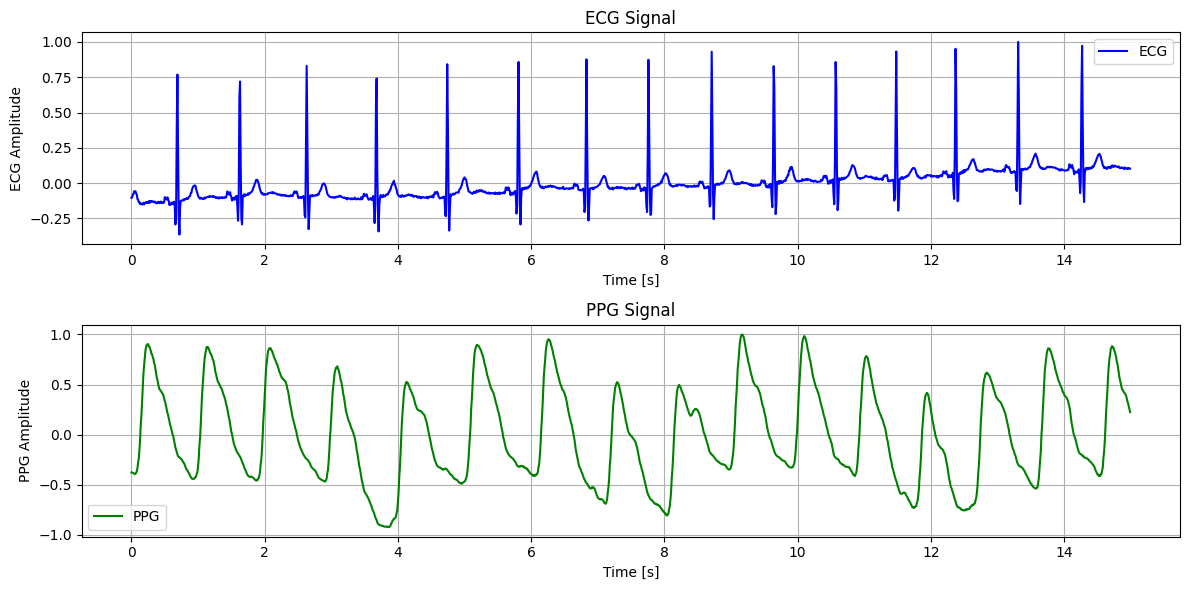

In [159]:
df = pd.read_csv('biosignals.csv')

# plot ECG and PPG with time
plt.figure(figsize=(12, 6))

# Plot ECG
plt.subplot(2, 1, 1)
plt.plot(df['t'], df['ecg'], label='ECG', color='b')
plt.title('ECG Signal')
plt.xlabel('Time [s]')
plt.ylabel('ECG Amplitude')
plt.grid(True)
plt.legend()

# Plot PPG
plt.subplot(2, 1, 2)
plt.plot(df['t'], df['ppg'], label='PPG', color='g')
plt.title('PPG Signal')
plt.xlabel('Time [s]')
plt.ylabel('PPG Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()

plt.show()

Average interval between heartbeats (ms): 0.97


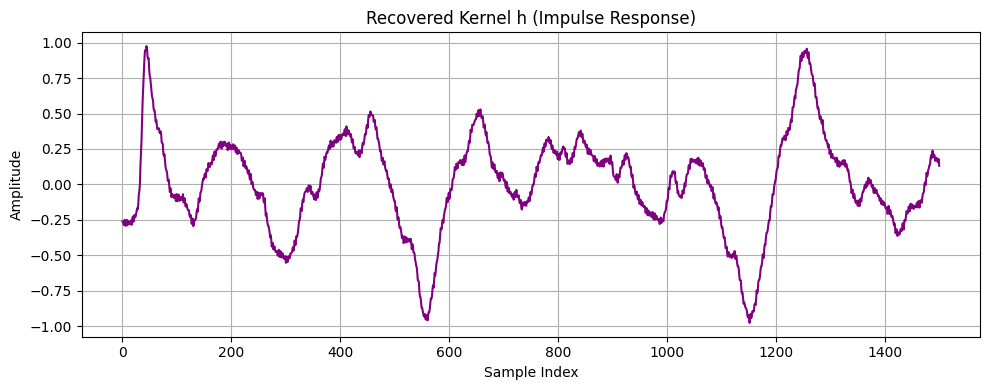

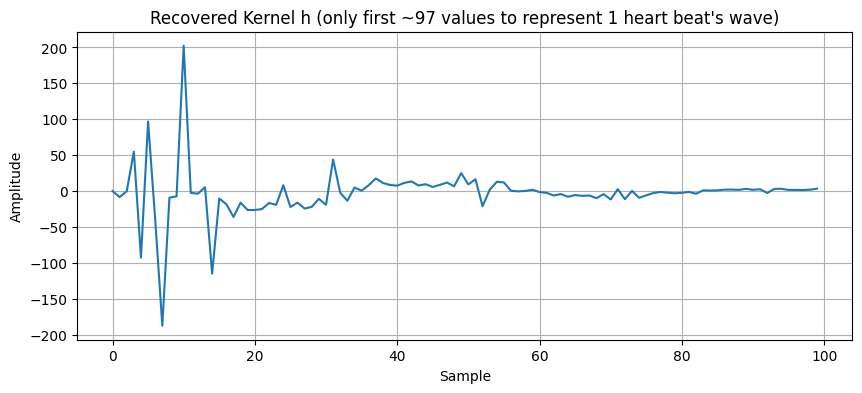

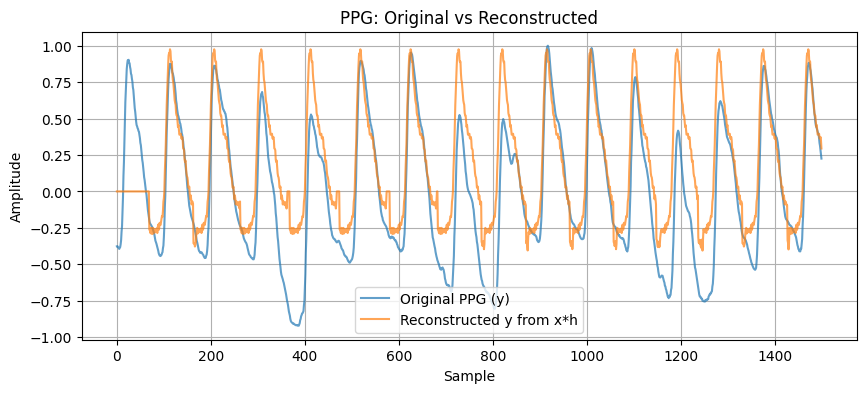

In [217]:
binary_ecg = np.loadtxt('binary_ecg_output.txt')
ppg = df['ppg'].values

# padding for fft
n = len(ppg)
N = 2 ** int(np.ceil(np.log2(n)))
x_padded = np.pad(binary_ecg, (0, N - len(binary_ecg)))
y_padded = np.pad(ppg, (0, N - len(ppg)))

# get ffts
X = np.fft.fft(x_padded)
Y = np.fft.fft(y_padded)

# bc binary ecg values, use small epsilon
eps = 1e-10
X_eps = np.where(np.abs(X) < epsilon, epsilon, X)

# solve for H in freq domain
H = Y / X_eps

# inverse fft to get h
h = np.fft.ifft(H).real  # time domain
h = h[:1500]
h_100 = h[:100]
h_100_padded = np.pad(h_100, (0, N - len(h_100)))

# reconstruct y from x and recovered h
Y_test = np.fft.ifft(np.fft.fft(x_padded) * np.fft.fft(h_100_padded)).real




# find viewing window for H
heartbeat_times = np.array([0.69,  1.63,  2.63,  3.68,  4.74,  5.81,  6.83,  7.76,  8.71,  9.64, 10.57, 11.48, 12.37, 13.31, 14.27])

intervals = np.diff(heartbeat_times)

# Calculate the average interval between heartbeats
avg_interval = np.mean(intervals)
print(f"Average interval between heartbeats (ms): {avg_interval}")

sampling_rate = 100
avg_interval_ms = 0.97 * 100




# plot the recovered kernel
plt.figure(figsize=(10, 4))
plt.plot(h, color='purple')
plt.title("Recovered Kernel h (Impulse Response)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# plot recovered h
plt.figure(figsize=(10, 4))
plt.plot(H[:100])  # show first ~97 values
plt.title("Recovered Kernel h (only first ~97 values to represent 1 heart beat's wave)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# plot original vs reconstructed PPG
plt.figure(figsize=(10, 4))
plt.plot(df['ppg'], label='Original PPG (y)', alpha=0.7)
plt.plot(Y_test[:1500], label='Reconstructed y from x*h', alpha=0.7)
plt.title("PPG: Original vs Reconstructed")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()